<a href="https://colab.research.google.com/github/FerMarcs/SSF-Oto24FernandaPamelaMarcosGonzalez/blob/main/Tarea%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El volumen estimado de una hemisferio de radio 1 es 2.0884 ± 0.0126.


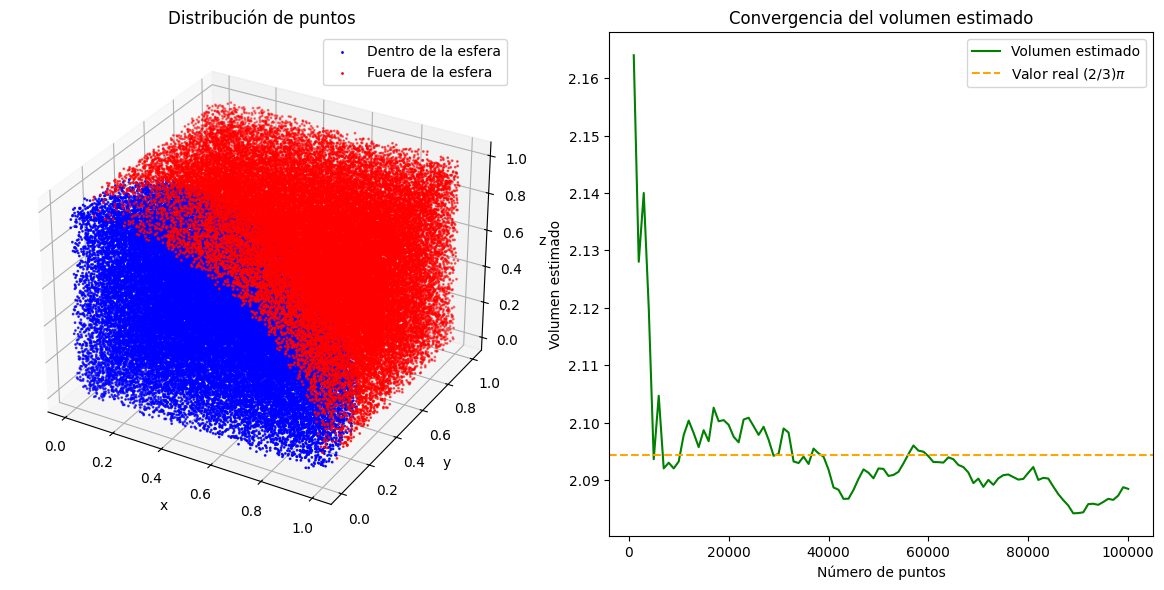

In [5]:
#Ejemplo 6.11
#Marcos González Fernanda Pamela

import matplotlib.pyplot as plt
from random import random
from math import sqrt

# Parámetros
N = 100000  # Número de puntos aleatorios
count = 0   # Contador de puntos dentro de la esfera
inside_points = []  # Lista de puntos dentro de la esfera
outside_points = []  # Lista de puntos fuera de la esfera
volumes = []  # Lista para registrar el volumen estimado en cada iteración

# Generar puntos y calcular volumen
for i in range(1, N + 1):
    point = (random(), random(), random())
    if point[0]**2 + point[1]**2 + point[2]**2 < 1:
        count += 1
        inside_points.append(point)  # Guardar puntos dentro de la esfera
    else:
        outside_points.append(point)  # Guardar puntos fuera de la esfera

    # Calcular volumen en la iteración actual
    if i % 1000 == 0:  # Guardar cada 1000 puntos para graficar
        volume_fraction = float(count) / float(i)
        estimated_volume = volume_fraction * 4
        volumes.append(estimated_volume)

# Resultado final
volume_fraction = float(count) / float(N)
estimated_volume = volume_fraction * 4
uncertainty = 4 * sqrt(N) / float(N)

# Imprimir resultado
print(f"El volumen estimado de una hemisferio de radio 1 es {estimated_volume:.4f} ± {uncertainty:.4f}.")

# Gráfica 1: Puntos dentro y fuera de la esfera
inside_x = [p[0] for p in inside_points]
inside_y = [p[1] for p in inside_points]
inside_z = [p[2] for p in inside_points]

outside_x = [p[0] for p in outside_points]
outside_y = [p[1] for p in outside_points]
outside_z = [p[2] for p in outside_points]

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(inside_x, inside_y, inside_z, c='blue', s=1, label='Dentro de la esfera')
ax1.scatter(outside_x, outside_y, outside_z, c='red', s=1, label='Fuera de la esfera')
ax1.set_title('Distribución de puntos')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.legend()

# Gráfica 2: Aproximación del volumen
iterations = [i * 1000 for i in range(1, len(volumes) + 1)]
plt.subplot(122)
plt.plot(iterations, volumes, label='Volumen estimado', color='green')
plt.axhline(y=(2/3)*3.14159, color='orange', linestyle='--', label='Valor real $(2/3)π$')
plt.title('Convergencia del volumen estimado')
plt.xlabel('Número de puntos')
plt.ylabel('Volumen estimado')
plt.legend()

plt.tight_layout()
plt.show()


Resultado estimado: 2.005718 ± 0.004773
Resultado exacto: 2


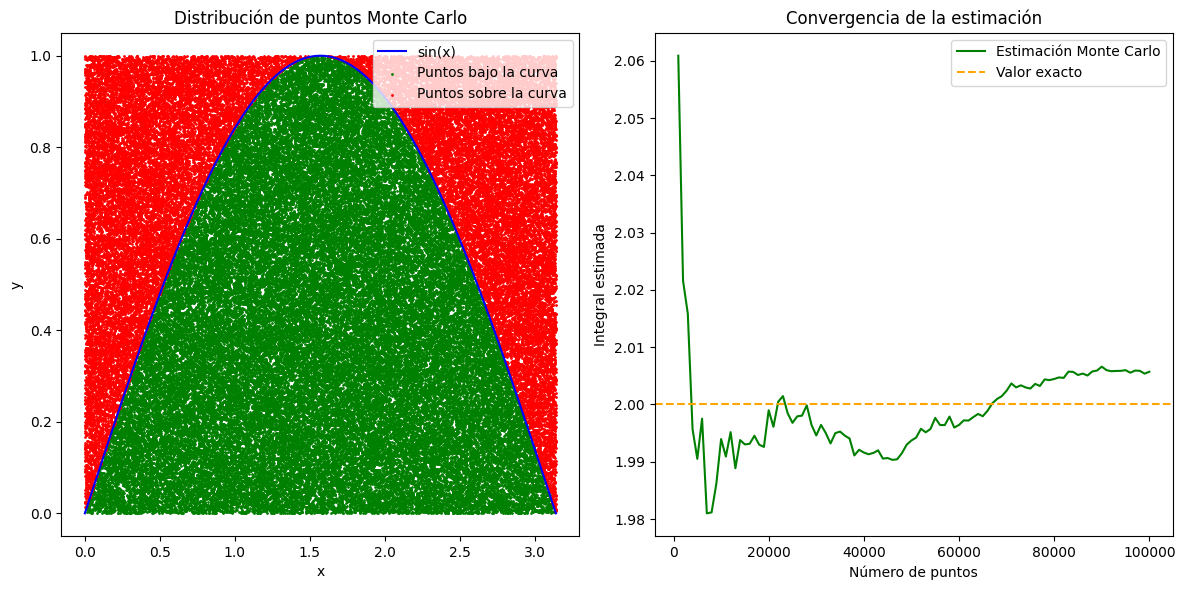

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 100000  # Número de puntos aleatorios
count = 0   # Contador para los puntos bajo la curva
total_area = np.pi  # Área del rectángulo conocido (base π y altura 1)
results = []  # Lista para registrar los resultados parciales

# Generar puntos aleatorios y calcular la integral
x_points = []  # Coordenadas x de los puntos bajo la curva
y_points = []  # Coordenadas y de los puntos bajo la curva
above_points_x = []  # Coordenadas x de los puntos sobre la curva
above_points_y = []  # Coordenadas y de los puntos sobre la curva

for i in range(N):
    # Generar un punto aleatorio (x, y) en el rectángulo [0, π] x [0, 1]
    x = np.random.uniform(0, np.pi)
    y = np.random.uniform(0, 1)

    if y <= np.sin(x):  # Verificar si el punto está bajo la curva
        count += 1
        x_points.append(x)
        y_points.append(y)
    else:
        above_points_x.append(x)
        above_points_y.append(y)

    # Calcular el resultado parcial cada 1000 puntos
    if (i + 1) % 1000 == 0:
        estimate = (count / (i + 1)) * total_area
        results.append(estimate)

# Resultado final
estimated_integral = (count / N) * total_area
uncertainty = total_area * np.sqrt(count / N * (1 - count / N) / N)

# Resultado real
true_value = 2  # El resultado exacto de la integral es 2

# Imprimir resultados
print(f"Resultado estimado: {estimated_integral:.6f} ± {uncertainty:.6f}")
print(f"Resultado exacto: {true_value}")

# Gráfica 1: Puntos bajo y sobre la curva
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(np.linspace(0, np.pi, 500), np.sin(np.linspace(0, np.pi, 500)), label="sin(x)", color="blue")
plt.scatter(x_points, y_points, color="green", s=1, label="Puntos bajo la curva")
plt.scatter(above_points_x, above_points_y, color="red", s=1, label="Puntos sobre la curva")
plt.title("Distribución de puntos Monte Carlo")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Gráfica 2: Convergencia de la integral
plt.subplot(122)
plt.plot(range(1000, N + 1, 1000), results, label="Estimación Monte Carlo", color="green")
plt.axhline(y=true_value, color="orange", linestyle="--", label="Valor exacto")
plt.title("Convergencia de la estimación")
plt.xlabel("Número de puntos")
plt.ylabel("Integral estimada")
plt.legend()

plt.tight_layout()
plt.show()


Estimación de α: 1.573281
El valor exacto conocido es 1/2 ≈ 0.5


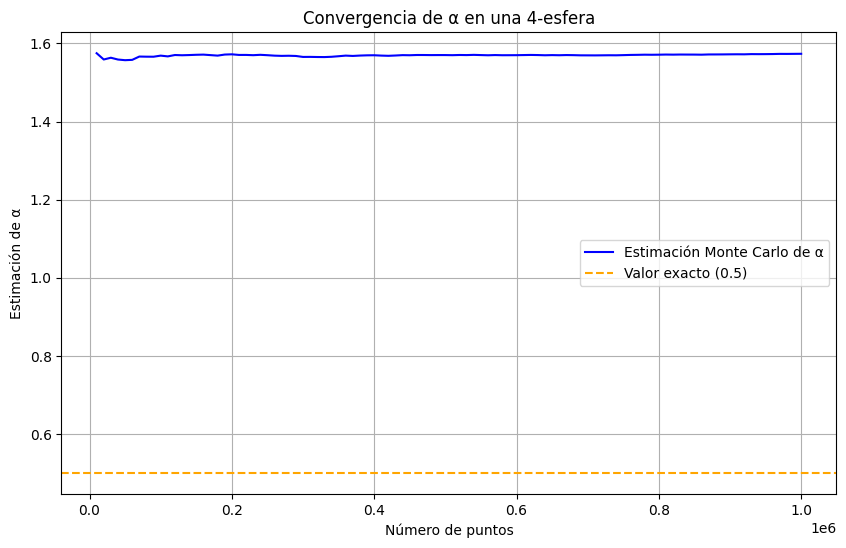

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 1000000  # Número de puntos aleatorios
r = 1  # Radio de la esfera (puede ser cualquier valor)
count = 0  # Contador de puntos dentro de la 4-esfera
results = []  # Para registrar las estimaciones de α en cada iteración

# Generar puntos aleatorios y verificar si están dentro de la esfera
for i in range(N):
    # Generar un punto aleatorio en el hipercubo [-r, r]^4
    x, y, z, w = np.random.uniform(-r, r, 4)
    # Verificar si el punto está dentro de la esfera
    if x**2 + y**2 + z**2 + w**2 <= r**2:
        count += 1

    # Calcular α en iteraciones específicas para graficar
    if (i + 1) % 10000 == 0:
        volume_fraction = count / (i + 1)
        hypercube_volume = (2 * r)**4
        estimated_volume = volume_fraction * hypercube_volume
        alpha = estimated_volume / (np.pi * r**4)
        results.append(alpha)

# Resultado final
volume_fraction = count / N
hypercube_volume = (2 * r)**4
estimated_volume = volume_fraction * hypercube_volume
alpha = estimated_volume / (np.pi * r**4)

# Imprimir resultados
print(f"Estimación de α: {alpha:.6f}")
print("El valor exacto conocido es 1/2 ≈ 0.5")

# Gráfica de convergencia de α
iterations = np.arange(10000, N + 1, 10000)
plt.figure(figsize=(10, 6))
plt.plot(iterations, results, label="Estimación Monte Carlo de α", color="blue")
plt.axhline(y=0.5, color="orange", linestyle="--", label="Valor exacto (0.5)")
plt.title("Convergencia de α en una 4-esfera")
plt.xlabel("Número de puntos")
plt.ylabel("Estimación de α")
plt.legend()
plt.grid()
plt.show()
